In [1]:
from os import listdir
import numpy as np
import operator
import matplotlib.pyplot as plt

import init

K-近邻算法 kNN

采用测量不同特征值之间的距离方法进行分类

优点：精度高，异常值不敏感，无数据输入假定

缺点：计算复杂度高，空间复杂度高

适用数据：数值型，标称型

In [2]:
def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0,0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()

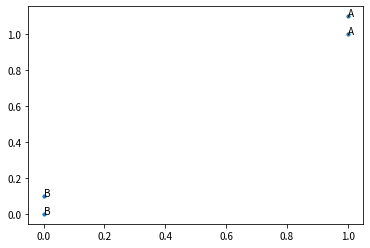

In [4]:
x = [x[0] for x in group]
y = [x[1] for x in group]

fig, ax = plt.subplots()
ax.scatter(x, y, s = 10)
for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

In [5]:
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    #print(tile(inX, (dataSetSize, 1)))
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis = 1)
    #print(sqDistances)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

距离公式 $d = \sqrt{(xA_0 - xB_0)^2+(xA_1 - xB_1)^2}$

In [6]:
classify0([0, 0], group, labels, 3)

'B'

In [7]:
def file2matrix(filename):
    fr = open(filename)
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    returnMat = np.zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    for line in arrayOfLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [8]:
datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')

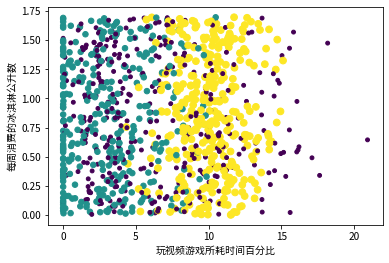

In [9]:
fig, ax = plt.subplots()
ax.scatter(datingDataMat[:,1], datingDataMat[:,2], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax.set_xlabel('玩视频游戏所耗时间百分比')
ax.set_ylabel('每周消费的冰淇淋公升数')
plt.show()

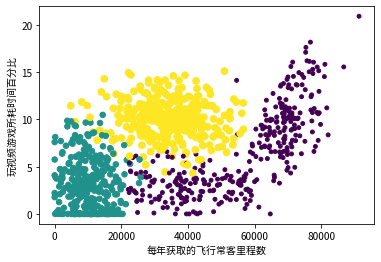

In [10]:
fig, ax = plt.subplots()
ax.scatter(datingDataMat[:,0], datingDataMat[:,1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax.set_xlabel('每年获取的飞行常客里程数')
ax.set_ylabel('玩视频游戏所耗时间百分比')
plt.show()

由于`飞行常客里程数`远大于其他特征值，需要做归一化。

In [11]:
def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1)) # 特征值相除
    return normDataSet, ranges, minVals

In [12]:
normMat, ranges, minVals = autoNorm(datingDataMat)

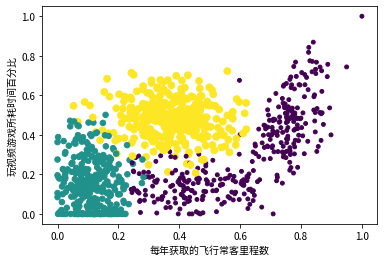

In [13]:
fig, ax = plt.subplots()
ax.scatter(normMat[:,0], normMat[:,1], 15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax.set_xlabel('每年获取的飞行常客里程数')
ax.set_ylabel('玩视频游戏所耗时间百分比')
plt.show()

### 测试算法：作为完整程序验证分类器

In [14]:
def datingClassTest():
    hoRatio = 0.10 # 测试数据比例 10%
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0

    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:], normMat[numTestVecs:,:], datingLabels[numTestVecs:], 3)
        #print("the classifier came back with: {}, the real answer is: {}".format(classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print("the total error rate is: {:f}".format(errorCount / float(numTestVecs)))

In [15]:
datingClassTest()

the total error rate is: 0.050000


### 使用算法：构建完整可用系统

In [16]:
def classifyPerson():
    resultList = ['not at all', 'is small doses', 'in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent filer miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat, datingLabels = file2matrix('datingTestSet2.txt')
    normMat, ranges, minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles, percentTats, iceCream])
    classifierResult =classify0((inArr - minVals)/ranges,normMat,datingLabels, 3)
    print("You will probably like this person: {}".format(resultList[classifierResult - 1]))

In [17]:
#classifyPerson()

## 手写识别系统

In [18]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32): # 32 lines
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i+j] = int(lineStr[j])
    return returnVect

In [19]:
testVector = img2vector('digits/testDigits/0_13.txt')

In [20]:
testVector[0, 32:63]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 测试算法：使用 k-近邻算法识别手写数字

In [21]:
def handwritingClassTest(k = 3):
    hwLabels = []
    trainingFileList = listdir('digits/trainingDigits')
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('digits/trainingDigits/{}'.format(fileNameStr))
    testFileList = listdir('digits/testDigits')
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('digits/testDigits/{}'.format(fileNameStr))
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, k)
        #print("the classifier came back with: {:d}, the real answer is: {:d}".format(classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print("\nthe total number of errors is: {:f}".format(errorCount))
    print("\nthe total error rate is: {:f}".format(errorCount/float(mTest)))
    return errorCount/float(mTest)

In [22]:
handwritingClassTest()


the total number of errors is: 12.000000

the total error rate is: 0.012685


0.012684989429175475

In [23]:
handwritingClassKList = range(3, 8, 1)
handwritingClassErrorRateList = [handwritingClassTest(x) for x in handwritingClassKList]


the total number of errors is: 12.000000

the total error rate is: 0.012685

the total number of errors is: 11.000000

the total error rate is: 0.011628

the total number of errors is: 17.000000

the total error rate is: 0.017970

the total number of errors is: 16.000000

the total error rate is: 0.016913

the total number of errors is: 20.000000

the total error rate is: 0.021142


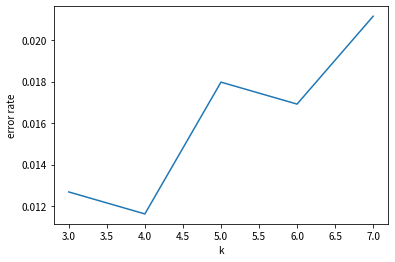

In [24]:
fig, ax = plt.subplots()
ax.plot(handwritingClassKList, handwritingClassErrorRateList)
ax.set_xlabel('k')
ax.set_ylabel('error rate')
plt.show()